In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

IMG0 = "./data/snoopy0.jpeg"
IMG1 = "./data/snoopy1.jpeg"
IMG2 = "./data/snoopy2.jpeg"
IMG3 = "./data/snoopy3.jpeg"
IMG4 = "./data/snoopy4.jpeg"
IMG5 = "./data/snoopy5.jpeg"
IMG6 = "./data/snoopy6.jpeg"
IMG7 = "./data/snoopy7.jpeg"
IMG8 = "./data/snoopy8.jpeg"
IMG9 = "./data/snoopy9.jpeg"

In [2]:
# Image Preprocessing
def imgPreprocess(image = IMG0):
    img = cv.imread(image, cv.IMREAD_COLOR)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.GaussianBlur(img, (25,25), 0)
    
    return img

In [3]:
def matchAB(image1, keypoints1, descriptor1, image2, keypoints2, descriptor2):
    bf = cv.BFMatcher(cv.NORM_L1, crossCheck = True)
    matches = bf.match(descriptor1, descriptor2)
    matches = sorted(matches, key = lambda x:x.distance)
    
    # displays first 50 matches sorted by distance
    img = cv.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    print("Number of matching keypoints: ", len(matches))
    plt.imshow(img),plt.show()
    
    return img

Number of SIFT keypoints:  8195


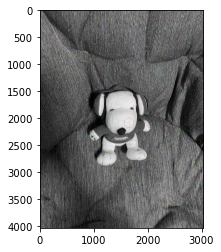

(<matplotlib.image.AxesImage at 0x7fd947148a60>, None)

In [4]:
def sift(image = IMG0):
    img = imgPreprocess(image) # img : image
    
    sift = cv.SIFT_create()
    kp, des = sift.detectAndCompute(img, None) # kp : keypoints, des : descriptor
    img = cv.drawKeypoints(img, kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
    
    #kp = sift.detect(img, None) 
    #kp, des = sift.compute(img, kp) ## difference?
    #img0 = cv.drawKeypoints(img, kp, 0, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    print("Number of SIFT keypoints: ", len(kp))
    
    return img, kp, des

img1, kp1, des1 = sift(IMG0)
cv.imwrite("sift_keypoints.jpg", img1)
plt.imshow(img1),plt.show()

Number of FAST keypoints with non max suppresion:  249


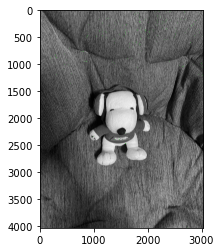

(<matplotlib.image.AxesImage at 0x7fd9845f8b50>, None)

In [5]:
def fast(image = IMG0):
    img = imgPreprocess(image)
    
    fast = cv.FastFeatureDetector_create()
    kp_nonmax = fast.detect(img, None) # with non max suppression
    
    #fast.setNonmaxSuppression(False)
    #kp = fast.detect(img, None) # without non max suppression
    
    img = cv.drawKeypoints(img, kp_nonmax, None, color=(0,255,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
    #img1 = cv.drawKeypoints(img, kp, 0, color=(0,255,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    print("Number of FAST keypoints with non max suppresion: ", len(kp_nonmax))
    
    return img, kp_nonmax

img1, kp1 = fast(IMG0)
cv.imwrite("fast_keypoints.jpg", img1)
plt.imshow(img1),plt.show()

Number of FAST keypoints with non max suppresion:  249


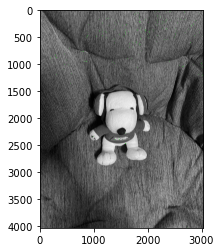

(<matplotlib.image.AxesImage at 0x7fd8cbb44970>, None)

In [6]:
def brief(image = IMG0):
    img, kp = fast(image)
    
    brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
    kp, des = brief.compute(img, kp)
    img = cv.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return img, kp, des

img1, kp1, des1 = brief(IMG0)
plt.imshow(img1),plt.show()

Number of ORB keypoints:  249


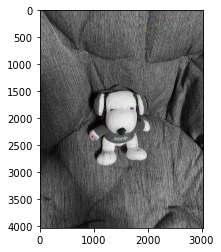

(<matplotlib.image.AxesImage at 0x7fd8cb9f6490>, None)

In [7]:
def orb(image = IMG0):
    img = imgPreprocess(image)

    orb = cv.ORB_create()
    kp, des = orb.detectAndCompute(img, None)
    img = cv.drawKeypoints(img, kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    print("Number of ORB keypoints: ", len(kp))
    
    return img, kp, des

img1, kp1, des1 = orb(IMG0)
cv.imwrite("orb_keypoints.jpg", img1)
plt.imshow(img1),plt.show()

Number of SIFT keypoints:  8195
Number of SIFT keypoints:  3393
Number of matching keypoints:  1085


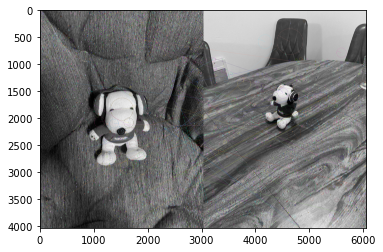

Number of FAST keypoints with non max suppresion:  249
Number of FAST keypoints with non max suppresion:  92
Number of matching keypoints:  24


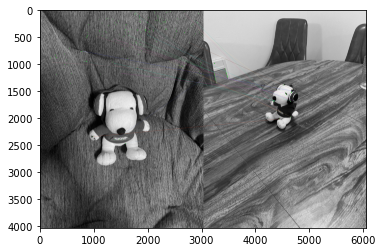

Number of ORB keypoints:  249
Number of ORB keypoints:  301
Number of matching keypoints:  66


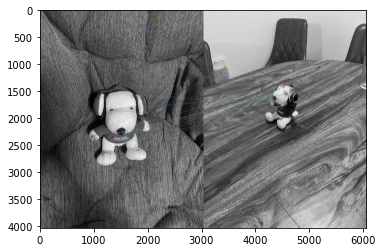

True

In [13]:
img1, kp1, des1 = sift(IMG0)
img2, kp2, des2 = sift(IMG3)

img = matchAB(img1, kp1, des1, img2, kp2, des2)
cv.imwrite("sift_match.jpg", img)

img1, kp1, des1 = brief(IMG0)
img2, kp2, des2 = brief(IMG3)

img = matchAB(img1, kp1, des1, img2, kp2, des2)
cv.imwrite("brief_match.jpg", img)

img1, kp1, des1 = orb(IMG0)
img2, kp2, des2 = orb(IMG3)

img = matchAB(img1, kp1, des1, img2, kp2, des2)
cv.imwrite("orb_match.jpg", img)